#Stock Market Prediction and Forecasting Using Stacked LSTM

In [ ]:
#Keras and Tensorflow > 2.0

In [ ]:
# Data Collection
import pandas_datareader as pdr

In [ ]:
key = '8138a60a6bcc7cdfa486834b128d5ce3c3a3e417'

In [ ]:
df = pdr.get_data_tiingo('AAPL', api_key=key)
#df = pdr.get_data_tiingo('https://api.tiingo.com/tiingo/crypto/prices?tickers=Binance&startDate=2019-01-02&resampleFreq=5min')

/usr/local/lib/python3.7/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [ ]:
df.to_csv('AAPL.csv')
#df.to_csv('Binance.csv')

In [ ]:
import pandas as pd

In [ ]:
df.head()

close     high     low     open    volume  \
symbol date                                                                    
AAPL   2017-11-03 00:00:00+00:00  172.50  174.260  171.12  174.000  58683826   
       2017-11-06 00:00:00+00:00  174.25  174.990  171.72  172.365  34242566   
       2017-11-07 00:00:00+00:00  174.81  175.250  173.60  173.910  23910914   
       2017-11-08 00:00:00+00:00  176.24  176.240  174.33  174.660  23907639   
       2017-11-09 00:00:00+00:00  175.88  176.095  173.14  175.110  28636531   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2017-11-03 00:00:00+00:00  40.926202  41.343768  40.598792  41.282082   
       2017-11-06 00:00:00+00:00  41.341395  41.516962  40.741144  40.894172   
       2017-11-07 00:00:00+00:00  41.474257  41.578648  41.187180  41.260729   
       2017-11-08 00:00:00+00:00  41.813529  41.813529  41.360375  41.438669   
       2017-11-09 00:00:00+00:00  41.728118  41.779127  41.078044  41.545433   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2017-11-03 00:00:00+00:00  234735304      0.0          1.0  
       2017-11-06 00:00:00+00:00  136970264      0.0          1.0  
       2017-11-07 00:00:00+00:00   95643656      0.0          1.0  
       2017-11-08 00:00:00+00:00   95630556      0.0          1.0  
       2017-11-09 00:00:00+00:00  114546124      0.0          1.0

In [ ]:
df.tail()

close     high     low     open     volume  \
symbol date                                                                     
AAPL   2022-10-26 00:00:00+00:00  149.35  151.990  148.04  150.960   88436172   
       2022-10-27 00:00:00+00:00  144.80  149.046  144.13  148.070  109180150   
       2022-10-28 00:00:00+00:00  155.74  157.500  147.82  148.200  164762371   
       2022-10-31 00:00:00+00:00  153.34  154.240  151.92  153.155   97943171   
       2022-11-01 00:00:00+00:00  150.65  155.450  149.13  155.080   80379345   

                                  adjClose  adjHigh  adjLow  adjOpen  \
symbol date                                                            
AAPL   2022-10-26 00:00:00+00:00    149.35  151.990  148.04  150.960   
       2022-10-27 00:00:00+00:00    144.80  149.046  144.13  148.070   
       2022-10-28 00:00:00+00:00    155.74  157.500  147.82  148.200   
       2022-10-31 00:00:00+00:00    153.34  154.240  151.92  153.155   
       2022-11-01 00:00:00+00:00    150.65  155.450  149.13  155.080   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2022-10-26 00:00:00+00:00   88436172      0.0          1.0  
       2022-10-27 00:00:00+00:00  109180150      0.0          1.0  
       2022-10-28 00:00:00+00:00  164762371      0.0          1.0  
       2022-10-31 00:00:00+00:00   97943171      0.0          1.0  
       2022-11-01 00:00:00+00:00   80379345      0.0          1.0

In [ ]:
df1 = df.reset_index() ['close']

In [ ]:
df1.shape

(1257,)

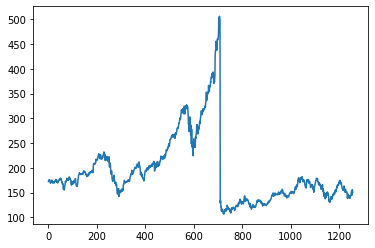

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

LSTM are sensitive to the scale of the data. So we apply MinMax scaler

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1.shape

(1257, 1)

In [ ]:
#Spliting dataset into train and test split
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data,test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [ ]:
import numpy
#converting the array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step):
    a = dataset[i:(i+time_step), 0]  # 1,2,3 ... 100 where y will get 101 value
    dataX.append(a)
    dataY.append(dataset[i+time_step, 0])
  return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t, t+1, t+2, t+3 and then Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train)

[[0.16445836 0.16884158 0.17024421 ... 0.15403882 0.14938009 0.15263619]
 [0.16884158 0.17024421 0.17382592 ... 0.14938009 0.15263619 0.14988103]
 [0.17024421 0.17382592 0.17292423 ... 0.15263619 0.14988103 0.15416406]
 ...
 [0.01497808 0.02624922 0.01665623 ... 0.0882154  0.07576706 0.06291797]
 [0.02624922 0.01665623 0.01292423 ... 0.07576706 0.06291797 0.06837821]
 [0.01665623 0.01292423 0.02132749 ... 0.06291797 0.06837821 0.0705072 ]]


In [ ]:
len(test_data)

440

In [ ]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

Data Preparation process is over.
Next we need to create LSTM model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_16 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_17 (LSTM)              (None, 50)                20200     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 13s 408ms/step - loss: 0.0558 - val_loss: 0.0097
Epoch 2/100
12/12 [==============================] - 3s 253ms/step - loss: 0.0146 - val_loss: 0.0061
Epoch 3/100
12/12 [==============================] - 3s 239ms/step - loss: 0.0120 - val_loss: 5.8924e-04
Epoch 4/100
12/12 [==============================] - 3s 238ms/step - loss: 0.0099 - val_loss: 3.5921e-04
Epoch 5/100
12/12 [==============================] - 3s 242ms/step - loss: 0.0089 - val_loss: 4.8571e-04
Epoch 6/100
12/12 [==============================] - 3s 243ms/step - loss: 0.0076 - val_loss: 5.9528e-04
Epoch 7/100
12/12 [==============================] - 3s 240ms/step - loss: 0.0064 - val_loss: 4.3462e-04
Epoch 8/100
12/12 [==============================] - 3s 239ms/step - loss: 0.0070 - val_loss: 3.1085e-04
Epoch 9/100
12/12 [==============================] - 3s 234ms/step - loss: 0.0057 - val_loss: 6.7080e-04
Epoch 10/100
12/12 [==============================] - 3s 239ms

In [ ]:
import tensorflow as tf
tf.__version__

'2.9.2'

In [ ]:
## Lets Do the prediction and check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 1s 45ms/step


In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

232.230884510943

In [ ]:
# Test Data RMSE
math.sqrt(mean_squared_error(ytest, test_predict))

156.7315051796269

Since the value is around 157 the prediction might be good.

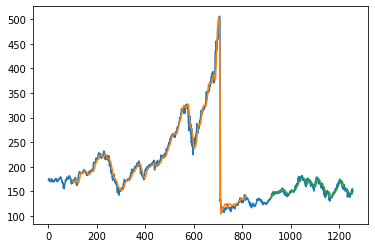

In [ ]:
#Plotting
#shift train predictions for plotting
look_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
#shift test predict for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2):len(df1), :] = test_predict
#plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

We have predicted the output. And next we are going to be predicting the next future 30 days

In [ ]:
len(test_data)

440

In [ ]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
x_input=test_data[340:].reshape(1,-1)

In [ ]:
x_input.shape

(1, 100)

In [ ]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [ ]:
len(temp_input)

100

In [ ]:
from numpy import array

lst_output=[]
n_steps = 100
i=0
while(i<30):
  if(len(temp_input)>100):
    #print(temp_input)
    x_input=np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    x_input=x_input.reshape(1,-1)
    x_input=x_input.reshape((1,n_steps,1))
    #print(x_input)
    yhat = model.predict(x_input, verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    #print(temp_input)
    lst_output.extend(yhat.tolist())
    i=i+1
  else:
    x_input=x_input.reshape((1, n_steps,1))
    yhat = model.predict(x_input,verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i=i+1

print(lst_output)

[0.10876714]
101
1 day input [0.0627176  0.06492173 0.07160927 0.05815905 0.06191609 0.07271133
 0.07140889 0.0787226  0.08721353 0.08721353 0.07664371 0.08112711
 0.07484033 0.0803757  0.08696306 0.09036944 0.09896055 0.10068879
 0.0952536  0.09773325 0.09680651 0.10427051 0.10852849 0.10076393
 0.11060739 0.11571697 0.12150282 0.1183469  0.11549155 0.11211021
 0.12510958 0.12651221 0.13943644 0.13693175 0.1331747  0.14850344
 0.14770194 0.14654978 0.14534753 0.14547276 0.15629305 0.15441453
 0.16345648 0.1661866  0.16578585 0.16959299 0.16859111 0.16200376
 0.15211021 0.15125861 0.15201002 0.15827176 0.14221666 0.13660614
 0.13041954 0.1261866  0.12804008 0.12265498 0.11944897 0.12303068
 0.11927364 0.1265623  0.14174076 0.11772073 0.12140263 0.11403882
 0.10985598 0.11932373 0.1253851  0.11742016 0.11496556 0.10917971
 0.11003131 0.11251096 0.10770194 0.08926738 0.07854728 0.08919224
 0.09833438 0.09908579 0.09665623 0.08328115 0.0841077  0.08050094
 0.07889793 0.09054477 0.07899812

In [ ]:
day_new = np.arange(1,100)
day_pred = np.arange(100,130)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

1257

In [ ]:
df3 = df1.tolist()
df3.extend(lst_output)

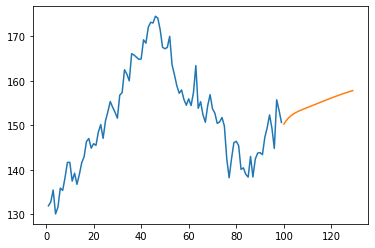

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))